<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [11]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [14]:
data = pd.read_csv('C:/devel/scala-spark-coursera/pythonML/data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [39]:
# Ваш код здесь
data.groupby(['sex'])['sex'].agg([len])


,len
sex,
Female,10771
Male,21790


In [45]:
data[data['sex'] == 'Female']['sex'].value_counts()

Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [44]:
# Ваш код здесь
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [68]:
data.groupby(['native-country'])['native-country'].value_counts()
all = data.size
germ = data[data['native-country'] == 'Germany']['native-country'].value_counts()
germ  / all

Germany    0.00028
Name: native-country, dtype: float64

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

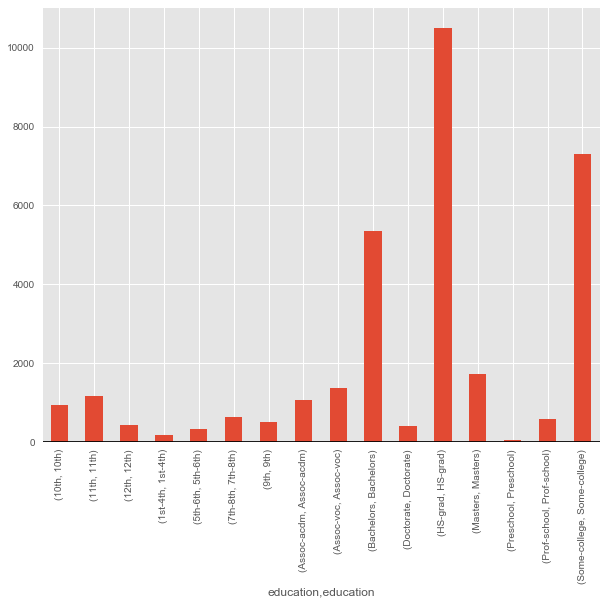

In [75]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.figure();
#data.groupby(['education'])['education'].value_counts()
data.groupby(['education'])['education'].value_counts().plot.bar(); plt.axhline(0, color='k')
#data['education'].head()
#.plot.bar(); plt.axhline(0, color='k')

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [83]:
#data[data['salary'] == '>50K']['age'].mean()
data.groupby(['salary'])['age'].std()

salary
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [126]:
res = data.loc[(data['salary'] == '>50K') & data['education'].isin(['Bachelors','Masters','Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Doctorate'])]['education'].value_counts()
type(res)
ressum = res.sum()
ressum

4535

In [128]:
res2 = data.loc[(data['salary'] == '>50K') & ~data['education'].isin(['Bachelors','Masters','Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Doctorate'])]['education'].value_counts()
ressum2 = res2.sum()
ressum / (ressum + ressum2) * 100

57.83701058538452

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [144]:
ser = data.groupby(['race'])['age'].agg([np.max])
ser


,amax
race,
Amer-Indian-Eskimo,82
Asian-Pac-Islander,90
Black,90
Other,77
White,90


In [164]:
data.groupby(['race']).describe()

age  capital-gain  capital-loss  \
race                                                                 
Amer-Indian-Eskimo count    311.000000    311.000000    311.000000   
                   mean      37.173633    625.266881     34.176849   
                   std       12.447130   2753.238961    245.583106   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       35.000000      0.000000      0.000000   
                   75%       45.500000      0.000000      0.000000   
                   max       82.000000  27828.000000   1980.000000   
Asian-Pac-Islander count   1039.000000   1039.000000   1039.000000   
                   mean      37.746872   1478.358037     97.222329   
                   std       12.825133   9986.156906    423.556931   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       36.000000      0.000000      0.000000   
                   75%       45.000000      0.000000      0.000000   
                   max       90.000000  99999.000000   2457.000000   
Black              count   3124.000000   3124.000000   3124.000000   
                   mean      37.767926    609.940461     60.385083   
                   std       12.759290   5139.653447    337.394121   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       36.000000      0.000000      0.000000   
                   75%       46.000000      0.000000      0.000000   
                   max       90.000000  99999.000000   4356.000000   
Other              count    271.000000    271.000000    271.000000   
                   mean      33.457565    934.660517     61.070111   
                   std       11.538865   8625.128995    322.452705   
                   min       17.000000      0.000000      0.000000   
                   25%       25.000000      0.000000      0.000000   
                   50%       31.000000      0.000000      0.000000   
                   75%       41.000000      0.000000      0.000000   
                   max       77.000000  99999.000000   2179.000000   
White              count  27816.000000  27816.000000  27816.000000   
                   mean      38.769881   1121.660375     90.806155   
                   std       13.782306   7504.533302    410.833347   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       37.000000      0.000000      0.000000   
                   75%       48.000000      0.000000      0.000000   
                   max       90.000000  99999.000000   4356.000000   

                          education-num        fnlwgt  hours-per-week  
race                                                                   
Amer-Indian-Eskimo count     311.000000  3.110000e+02      311.000000  
                   mean        9.311897  1.208311e+05       40.048232  
                   std         2.310387  8.833864e+04       11.695364  
                   min         2.000000  1.228500e+04        3.000000  
                   25%         9.000000  3.503650e+04       40.000000  
                   50%         9.000000  1.025410e+05       40.000000  
                   75%        10.000000  1.761420e+05       40.000000  
                   max        16.000000  4.451680e+05       84.000000  
Asian-Pac-Islander count    1039.000000  1.039000e+03     1039.000000  
                   mean       10.960539  1.599406e+05       40.127045  
                   std         2.811582  8.512231e+04       12.556816  
                   min         1.000000  1.487800e+04        1.000000  
                   25%         9.000000  9.332100e+04       40.000000  
              

In [166]:
ser['amax'][0:1]

race
Amer-Indian-Eskimo    82
Name: amax, dtype: int64

In [168]:
ser['amax'][0]

82

In [179]:
ser['amax']

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: amax, dtype: int64

In [181]:
ser.index[0]

'Amer-Indian-Eskimo'

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [192]:
data.loc[(data['salary'] == '>50K') & data['marital-status'].isin(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'])]['marital-status'].value_counts().sum()

6736

In [193]:
data.loc[(data['salary'] == '>50K') & ~data['marital-status'].isin(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'])]['marital-status'].value_counts().sum()

1105

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [226]:
maxHour = data['hours-per-week'].max()
df = data.loc[(data['hours-per-week'] == maxHour)]
df.groupby(['salary'])['salary'].value_counts()


salary  salary
<=50K   <=50K     60
>50K    >50K      25
Name: salary, dtype: int64

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [230]:
data.groupby(['native-country','salary'])['hours-per-week'].agg([np.mean])

mean
native-country             salary           
?                          <=50K   40.164760
                           >50K    45.547945
Cambodia                   <=50K   41.416667
                           >50K    40.000000
Canada                     <=50K   37.914634
                           >50K    45.641026
China                      <=50K   37.381818
                           >50K    38.900000
Columbia                   <=50K   38.684211
                           >50K    50.000000
Cuba                       <=50K   37.985714
                           >50K    42.440000
Dominican-Republic         <=50K   42.338235
                           >50K    47.000000
Ecuador                    <=50K   38.041667
                           >50K    48.750000
El-Salvador                <=50K   36.030928
                           >50K    45.000000
England                    <=50K   40.483333
                           >50K    44.533333
France                     <=50K   41.058824
                           >50K    50.750000
Germany                    <=50K   39.139785
                           >50K    44.977273
Greece                     <=50K   41.809524
                           >50K    50.625000
Guatemala                  <=50K   39.360656
                           >50K    36.666667
Haiti                      <=50K   36.325000
                           >50K    42.750000
...                                      ...
Mexico                     >50K    46.575758
Nicaragua                  <=50K   36.093750
                           >50K    37.500000
Outlying-US(Guam-USVI-etc) <=50K   41.857143
Peru                       <=50K   35.068966
                           >50K    40.000000
Philippines                <=50K   38.065693
                           >50K    43.032787
Poland                     <=50K   38.166667
                           >50K    39.000000
Portugal                   <=50K   41.939394
                           >50K    41.500000
Puerto-Rico                <=50K   38.470588
                           >50K    39.416667
Scotland                   <=50K   39.444444
                           >50K    46.666667
South                      <=50K   40.156250
                           >50K    51.437500
Taiwan                     <=50K   33.774194
                           >50K    46.800000
Thailand                   <=50K   42.866667
                           >50K    58.333333
Trinadad&Tobago            <=50K   37.058824
                           >50K    40.000000
United-States              <=50K   38.799127
                           >50K    45.505369
Vietnam                    <=50K   37.193548
                           >50K    39.200000
Yugoslavia                 <=50K   41.600000
                           >50K    49.500000

[82 rows x 1 columns]

In [232]:
sports = {99: 'Bhutan', 100:'Scotland',101:'Japan',102:'South Korea'}
s=pd.Series(sports)

In [234]:
s.iloc[2]

'Japan'

In [236]:
s.loc[101]

'Japan'

In [251]:
s = pd.Series(np.random.randint(0,10000,100000))

In [242]:
%%timeit -n 100
summary = 0
for item in s :
    summary += item

9.95 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [243]:
%%timeit -n 100
summary = np.sum(s)

419 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [253]:
s += 2
s.head()

0    9499
1    8806
2    2631
3    4730
4    1546
dtype: int32

In [245]:
%%timeit -n 10
for label,value in s.iteritems():
    s.loc[label] = value+2

7.8 s ± 274 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [255]:
%%timeit -n 10
s = pd.Series(np.random.randint(0,10000,100000))
s += 2

2.68 ms ± 270 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
